In [1]:
#importamos las librerias
import pandas as pd #manipulación y análisis de datos
import numpy as np #soporte para crear vectores y matrices grandes multidimensionales
import seaborn as sb #biblioteca de visualización de datos de Python
import matplotlib.pyplot as plt #biblioteca de visualización de datos de Python
import re #Expresiones regulares
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mainpath = "../dataset/"
filename = "imdb_simpsons_dataset.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
#Se utiliza la función .read_csv de la librería pandas para leer el dataset, luego este es asignado a la variable dataframe 'df'
df = pd.read_csv(fullpath, encoding='utf-8')

In [4]:
df.head()

,episode_no_abs,season_no,episode_no,episode_name,episode_airdate,episode_score,episode_votes,episode_description
0,1,1,1,Simpsons Roasting on an Open Fire,2-Sep-90,8.2,6953,Homer is forced to become a department store S...
1,2,1,2,Bart the Genius,14-Jan-90,7.7,4557,Bart ends up at a school for gifted children a...
2,3,1,3,Homer's Odyssey,21-Jan-90,7.4,4007,"After losing his job, Homer contemplates endin..."
3,4,1,4,There's No Disgrace Like Home,28-Jan-90,7.7,3955,After being embarrassed by the rest of the fam...
4,5,1,5,Bart the General,4-Feb-90,8.0,4299,After being beaten up by Nelson Muntz one too ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   episode_no_abs       705 non-null    int64  
 1   season_no            705 non-null    int64  
 2   episode_no           705 non-null    int64  
 3   episode_name         705 non-null    object 
 4   episode_airdate      705 non-null    object 
 5   episode_score        705 non-null    float64
 6   episode_votes        705 non-null    int64  
 7   episode_description  705 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 44.2+ KB


In [18]:
df['episode_airdate'] = pd.to_datetime(df['episode_airdate'])
df['episode_score'] = df['episode_score'].astype(float)
df['episode_votes'] = df['episode_votes'].astype(int)

episode_no_abs                  int64
season_no                       int64
episode_no                      int64
episode_name                   object
episode_airdate        datetime64[ns]
episode_score                 float64
episode_votes                   int32
episode_description            object
dtype: object

In [7]:
#se agrupan en el puntaje IMDB de cada capitulo
df_desc = df.groupby('season_no')['episode_score'].describe().round(1)
df_desc = df_desc[['mean', 'std', 'min', 'max']].reset_index()
df_desc

,season_no,mean,std,min,max
0,1,7.8,0.3,7.4,8.4
1,2,8.0,0.4,7.4,8.8
2,3,8.2,0.3,7.6,8.8
3,4,8.3,0.5,7.0,9.1
4,5,8.4,0.4,7.5,9.2
5,6,8.4,0.7,5.8,9.2
6,7,8.4,0.4,7.5,9.1
7,8,8.3,0.5,7.2,9.3
8,9,7.8,0.7,5.0,9.1
9,10,7.6,0.4,7.0,8.2


In [8]:
sb.set(rc = {'figure.figsize':(20,10)})
sb.set_palette("bright")

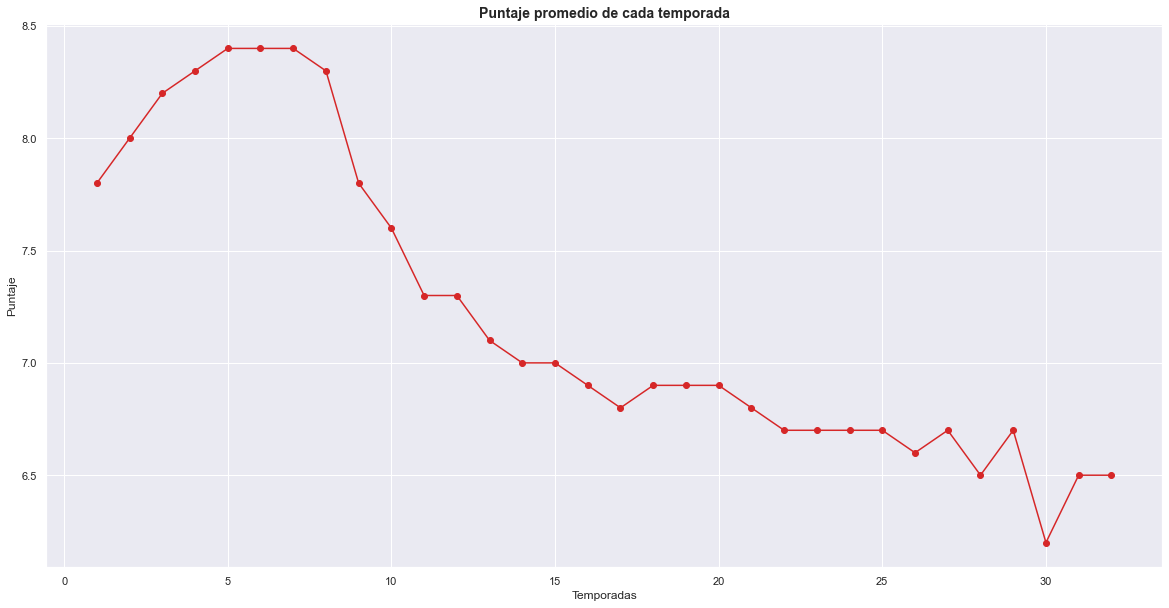

In [9]:
fig, ax = plt.subplots()
ax.plot(df_desc['season_no'], df_desc['mean'], marker = 'o', color = 'tab:red')

ax.set_title('Puntaje promedio de cada temporada', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Temporadas")
ax.set_ylabel("Puntaje")

plt.show()

In [10]:
df_desc_votation = df.groupby('season_no')['episode_votes'].describe().round(1)
df_desc_votation = df_desc_votation[['mean', 'std', 'min', 'max']].reset_index()
df_desc_votation

,season_no,mean,std,min,max
0,1,4090.2,915.8,3443.0,6953.0
1,2,3298.2,448.0,2769.0,4145.0
2,3,3013.8,423.9,2566.0,4113.0
3,4,3044.8,611.1,2405.0,4612.0
4,5,2930.5,530.1,2235.0,4576.0
5,6,2830.6,506.9,2272.0,4079.0
6,7,2710.0,478.7,2102.0,3763.0
7,8,2791.6,894.9,2040.0,5413.0
8,9,2240.4,479.6,1855.0,4185.0
9,10,1902.7,208.6,1630.0,2423.0


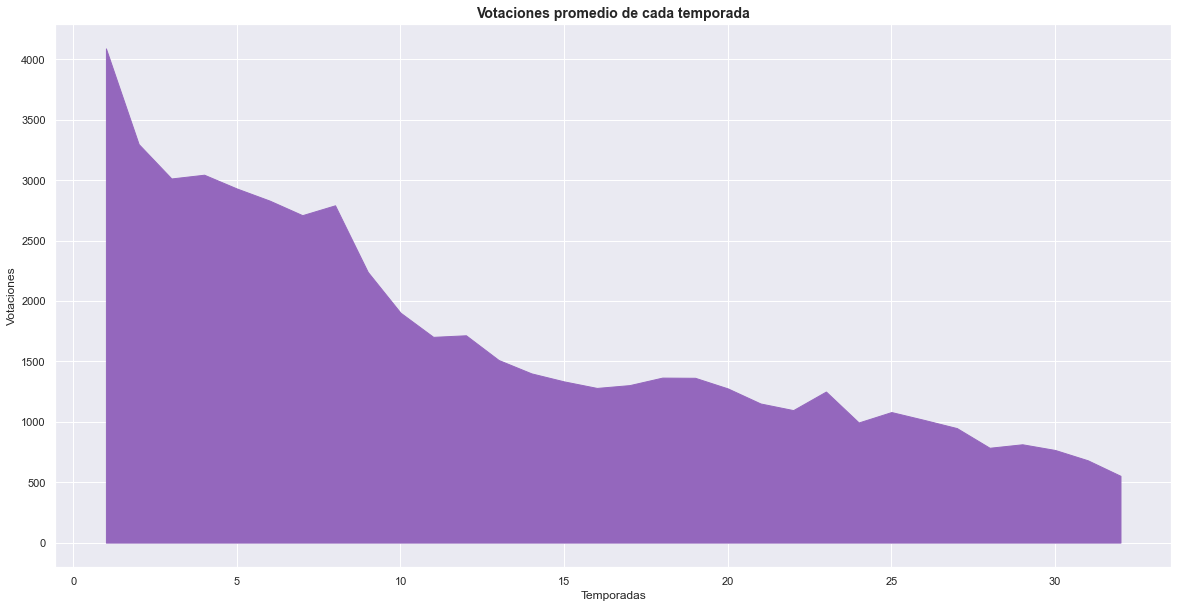

In [11]:
fig, ax = plt.subplots()
ax.fill_between(df_desc_votation['season_no'], df_desc_votation['mean'], color = 'tab:purple')
ax.set_title('Votaciones promedio de cada temporada', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Temporadas")
ax.set_ylabel("Votaciones")
plt.show()

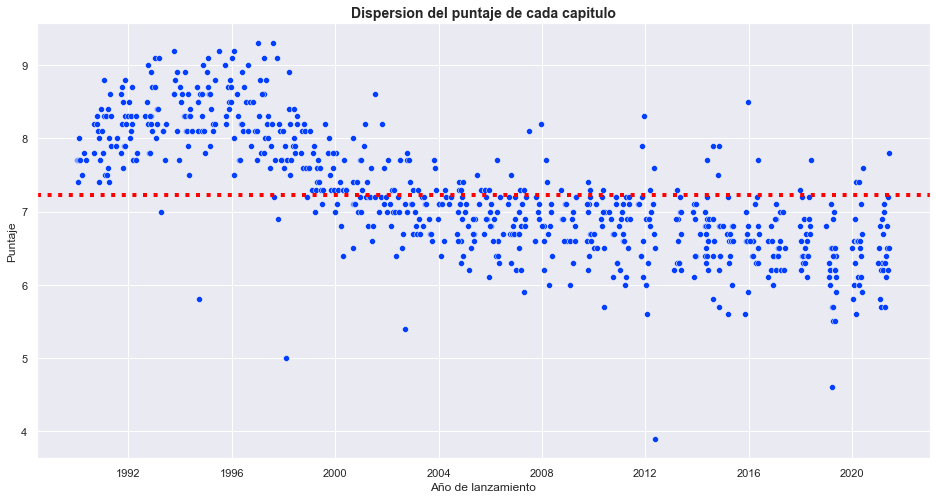

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=df, x='episode_airdate', y='episode_score', legend=False, zorder=2, ax=ax)
ax.set_title('Dispersion del puntaje de cada capitulo', fontdict = {'fontsize':14, 'fontweight':'bold'})
ax.set_xlabel("Año de lanzamiento")
ax.set_ylabel("Puntaje")

linea_regresion = df['episode_score'].mean()
ax.axhline(linea_regresion,
         ls=':',
         lw=4,
         c='red',
         label='Promedio de puntaje de cada episodio')
